# Power Outages
This project uses major power outage data in the continental U.S. from January 2000 to July 2016. Here, a major power  outage is defined as a power outage that impacted at least 50,000 customers or caused an unplanned firm load loss of atleast 300MW. Interesting questions to consider include:
- Where and when do major power outages tend to occur?
- What are the characteristics of major power outages with higher severity? Variables to consider include location, time, climate, land-use characteristics, electricity consumption patterns, economic characteristics, etc. What risk factors may an energy company want to look into when predicting the location and severity of its next major power outage?
- What characteristics are associated with each category of cause?
- How have characteristics of major power outages changed over time? Is there a clear trend?

### Getting the Data
The data is downloadable [here](https://engineering.purdue.edu/LASCI/research-data/outages/outagerisks).

A data dictionary is available at this [article](https://www.sciencedirect.com/science/article/pii/S2352340918307182) under *Table 1. Variable descriptions*.

### Cleaning and EDA
- Note that the data is given as an Excel file rather than a CSV. Open the data in Excel or another spreadsheet application and determine which rows and columns of the Excel spreadsheet should be ignored when loading the data in pandas.
- Clean the data.
    - The power outage start date and time is given by `OUTAGE.START.DATE` and `OUTAGE.START.TIME`. It would be preferable if these two columns were combined into one datetime column. Combine `OUTAGE.START.DATE` and `OUTAGE.START.TIME` into a new datetime column called `OUTAGE.START`. Similarly, combine `OUTAGE.RESTORATION.DATE` and `OUTAGE.RESTORATION.TIME` into a new datetime column called `OUTAGE.RESTORATION`.
- Understand the data in ways relevant to your question using univariate and bivariate analysis of the data as well as aggregations.

*Hint 1: pandas can load multiple filetypes: `pd.read_csv`, `pd.read_excel`, `pd.read_html`, `pd.read_json`, etc.*

*Hint 2: `pd.to_datetime` and `pd.to_timedelta` will be useful here.*

*Tip: To visualize geospatial data, consider [Folium](https://python-visualization.github.io/folium/) or another geospatial plotting library.*

### Assessment of Missingness
- Assess the missingness of a column that is not missing by  design.

### Hypothesis Test
Find a hypothesis test to perform. You can use the questions at the top of the notebook for inspiration.

# Summary of Findings

### Introduction
TODO

### Cleaning and EDA
TODO

### Assessment of Missingness
TODO

### Hypothesis Test
TODO

# Code

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import datetime
from IPython.display import display
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures

In [3]:
import folium

### Cleaning and EDA

In [9]:
# TODO
pd.set_option('display.max_columns', None)

In [10]:
# Load the Data
df = pd.read_excel('outage.xlsx', skiprows = 5)
df = df.drop(0).drop('variables', axis = 1).reset_index(drop=True)

In [11]:
start_time = pd.to_datetime(
    df['OUTAGE.START.DATE'].dropna().astype(str).str.split(' ').str[0] 
    + ' ' 
    + df['OUTAGE.START.TIME'].dropna().astype(str)
)

restoration_time = pd.to_datetime(
    df['OUTAGE.RESTORATION.DATE'].dropna().astype(str).str.split(' ').str[0] 
    + ' ' 
    + df['OUTAGE.RESTORATION.TIME'].dropna().astype(str)
)

In [12]:
df['OUTAGE.RESTORATION'] = restoration_time
df['OUTAGE.START'] = start_time
df = df.drop(['OUTAGE.START.DATE', 'OUTAGE.START.TIME', 'OUTAGE.RESTORATION.DATE', 'OUTAGE.RESTORATION.TIME', 'OBS'], axis = 1)
df

,YEAR,MONTH,U.S._STATE,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL,CLIMATE.CATEGORY,CAUSE.CATEGORY,CAUSE.CATEGORY.DETAIL,HURRICANE.NAMES,OUTAGE.DURATION,DEMAND.LOSS.MW,CUSTOMERS.AFFECTED,RES.PRICE,COM.PRICE,IND.PRICE,TOTAL.PRICE,RES.SALES,COM.SALES,IND.SALES,TOTAL.SALES,RES.PERCEN,COM.PERCEN,IND.PERCEN,RES.CUSTOMERS,COM.CUSTOMERS,IND.CUSTOMERS,TOTAL.CUSTOMERS,RES.CUST.PCT,COM.CUST.PCT,IND.CUST.PCT,PC.REALGSP.STATE,PC.REALGSP.USA,PC.REALGSP.REL,PC.REALGSP.CHANGE,UTIL.REALGSP,TOTAL.REALGSP,UTIL.CONTRI,PI.UTIL.OFUSA,POPULATION,POPPCT_URBAN,POPPCT_UC,POPDEN_URBAN,POPDEN_UC,POPDEN_RURAL,AREAPCT_URBAN,AREAPCT_UC,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND,OUTAGE.RESTORATION,OUTAGE.START
0,2011.0,7.0,Minnesota,MN,MRO,East North Central,-0.3,normal,severe weather,NaN,NaN,3060,NaN,70000.0,11.6,9.18,6.81,9.28,2332915,2114774,2113291,6562520,35.5491,32.225,32.2024,2308736.0,276286.0,10673.0,2595696.0,88.9448,10.644,0.411181,51268,47586,1.07738,1.6,4802,274182,1.75139,2.2,5348119.0,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874,2011-07-03 20:00:00,2011-07-01 17:00:00
1,2014.0,5.0,Minnesota,MN,MRO,East North Central,-0.1,normal,intentional attack,vandalism,NaN,1,NaN,NaN,12.12,9.71,6.49,9.28,1586986,1807756,1887927,5284231,30.0325,34.2104,35.7276,2345860.0,284978.0,9898.0,2640737.0,88.8335,10.7916,0.37482,53499,49091,1.08979,1.9,5226,291955,1.79,2.2,5457125.0,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874,2014-05-11 18:39:00,2014-05-11 18:38:00
2,2010.0,10.0,Minnesota,MN,MRO,East North Central,-1.5,cold,severe weather,heavy wind,NaN,3000,NaN,70000.0,10.87,8.19,6.07,8.15,1467293,1801683,1951295,5222116,28.0977,34.501,37.366,2300291.0,276463.0,10150.0,2586905.0,88.9206,10.687,0.392361,50447,47287,1.06683,2.7,4571,267895,1.70627,2.1,5310903.0,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874,2010-10-28 22:00:00,2010-10-26 20:00:00
3,2012.0,6.0,Minnesota,MN,MRO,East North Central,-0.1,normal,severe weather,thunderstorm,NaN,2550,NaN,68200.0,11.79,9.25,6.71,9.19,1851519,1941174,1993026,5787064,31.9941,33.5433,34.4393,2317336.0,278466.0,11010.0,2606813.0,88.8954,10.6822,0.422355,51598,48156,1.07148,0.6,5364,277627,1.93209,2.2,5380443.0,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874,2012-06-20 23:00:00,2012-06-19 04:30:00
4,2015.0,7.0,Minnesota,MN,MRO,East North Central,1.2,warm,severe weather,NaN,NaN,1740,250,250000.0,13.07,10.16,7.74,10.43,2028875,2161612,1777937,5970339,33.9826,36.2059,29.7795,2374674.0,289044.0,9812.0,2673531.0,88.8216,10.8113,0.367005,54431,49844,1.09203,1.7,4873,292023,1.6687,2.2,5489594.0,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874,2015-07-19 07:00:00,2015-07-18 02:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,2011.0,12.0,North Dakota,ND,MRO,West North Central,-0.9,cold,public appeal,NaN,NaN,720,155,34500.0,8.41,7.8,6.2,7.56,488853,438133,386693,1313678,37.2125,33.3516,29.4359,330738.0,60017.0,3639.0,394394.0,83.8598,15.2175,0.922681,57012,47586,1.19808,9.8,934,39067,2.39076,0.5,685326.0,59.9,19.9,2192.2,1868.2,3.9,0.27,0.1,97.5996,2.40177,2.40177,2011-12-06 20:00:00,2011-12-06 08:00:00
1530,2006.0,NaN,North Dakota,ND,MRO,West North Central,NaN,NaN,fuel supply emergency,Coal,NaN,NaN,1650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,309997.0,53709.0,2331.0,366037.0,84.6901,14.6731,0.636821,42913,48909,0.877405,3.5,1019,27868,3.65652,0.7,649422.0,59.9,19.9,2192.2,1868.2,3.9,0.27,0.1,97.5996,2.40177,2.40177,NaT,NaT
1531,2009.0,8.0,South Dakota,SD,RFC,West North Central,0.5,warm,islanding,NaN,NaN,59,84,NaN,9.25,7.47,5.53,7.67,337874,370771,215406,924051,36.5644,40.1245,23.3111,367206.0,65971.0,3052.0,436229.0,84.1773,15.123,0.699633,45230,46680,0.968937,0,606,36504,1.66009,0.3,807067.0,56.65,26.73,2038.3,1905.4,4.7,0.3,0.15,98.3077,1.69226,1.69226,2009-08-29 23:53:00,20

# EDA

Now that we have cleaned up the data, let's look at the summary statistics of some columns.

In [13]:
df.describe()

,YEAR,MONTH,CUSTOMERS.AFFECTED,RES.CUSTOMERS,COM.CUSTOMERS,IND.CUSTOMERS,TOTAL.CUSTOMERS,POPULATION
count,1534.000000,1525.000000,1.091000e+03,1.534000e+03,1.534000e+03,1534.000000,1.534000e+03,1.534000e+03
mean,2010.119296,6.234754,1.434562e+05,5.026991e+06,6.842650e+05,33551.978488,5.746498e+06,1.319400e+07
std,3.822306,3.254510,2.869863e+05,3.990434e+06,5.557609e+05,40697.858852,4.577067e+06,1.155396e+07
min,2000.000000,1.000000,0.000000e+00,1.992150e+05,2.628300e+04,1.000000,2.255000e+05,5.598510e+05
25%,2008.000000,4.000000,9.650000e+03,2.149637e+06,2.741770e+05,8363.250000,2.431469e+06,5.310903e+06
50%,2011.000000,6.000000,7.013500e+04,3.457325e+06,4.816630e+05,17837.500000,3.951709e+06,8.769252e+06
75%,2013.000000,9.000000,1.500000e+05,7.118901e+06,1.047563e+06,29163.000000,8.199451e+06,1.940292e+07
max,2016.000000,12.000000,3.241437e+06,1.344513e+07,1.834779e+06,168586.000000,1.528602e+07,3.929648e+07


In [14]:
q_3 = df.describe()['CUSTOMERS.AFFECTED']['75%']
q_3

150000.0

In [15]:
cus_aff_mean = df.describe()['CUSTOMERS.AFFECTED']['mean']
cus_aff_mean

143456.22273143905

We see that the Q3 is less than the mean of number of customers affected by power outage. Additionally, we can clearly observe that the number of customers affected by the outage has a extremely large gap between the min value and max value. The max value can potentially be an outlier that drags our mean higher. It could be that a specific state is highly vulnerable/frequent to power outage. To furthur invetigate their relation, let's plot the both the distribution of customers affected and outage durations.

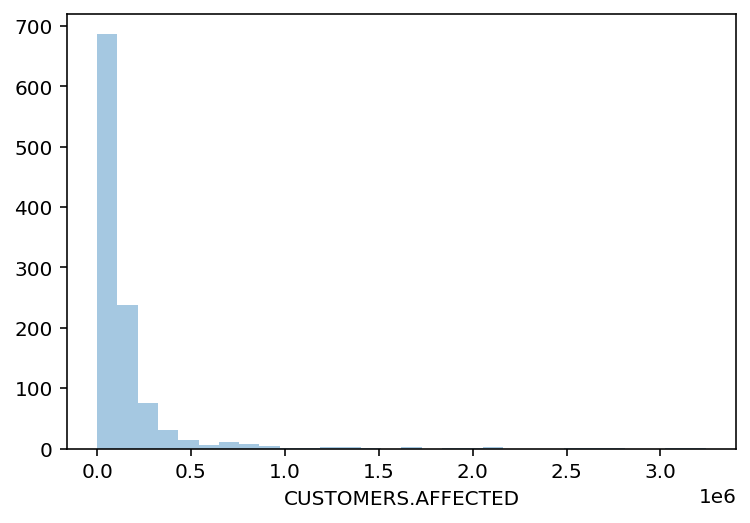

In [31]:
sns.distplot(df["CUSTOMERS.AFFECTED"], kde=False, bins=30)

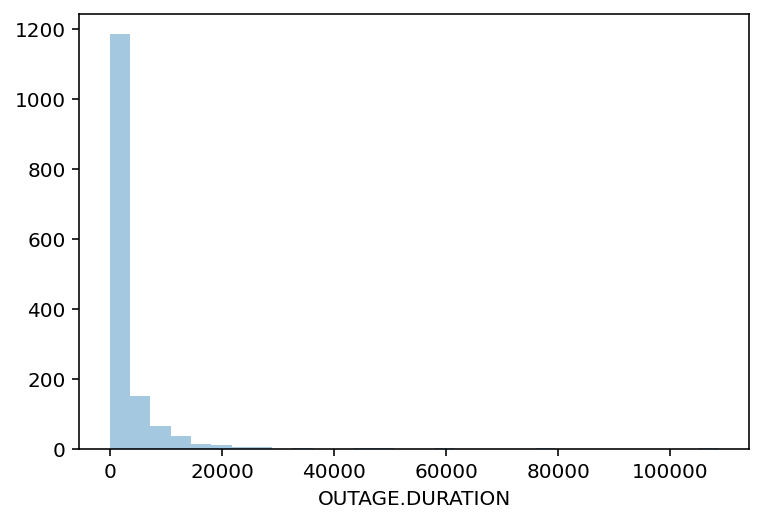

In [33]:
sns.distplot(df["OUTAGE.DURATION"], kde=False, bins=30)

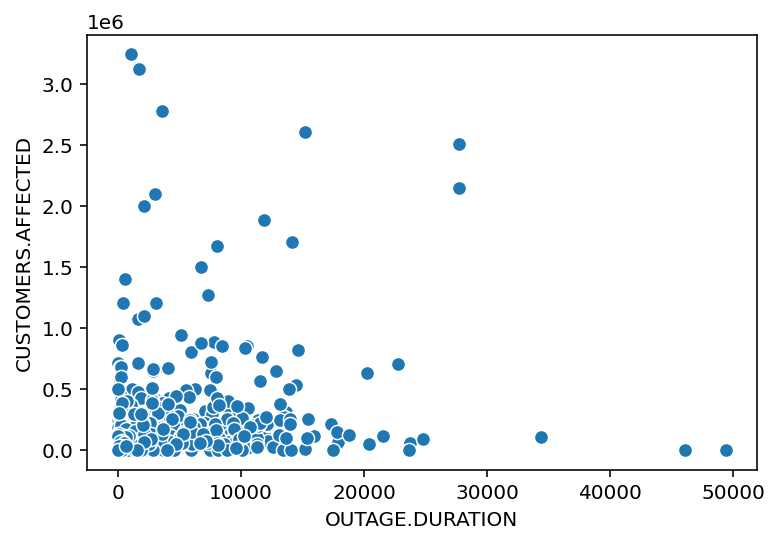

In [34]:
sns.scatterplot(df['OUTAGE.DURATION'], df['CUSTOMERS.AFFECTED'], s=50)

There is not a strong correlation, but we do see that majority of the data points cluster at lower left corner, where both number of customers affected and outage durations are small, which is quite intuitive.

We are interested in how outage duration varies for different state, which can be done using a choropleth map via folium.

In [35]:
url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
state_geo = f"{url}/us-states.json"

m = folium.Map(location=[48, -102], zoom_start=3)
folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=df,
    columns=['POSTAL.CODE', 'OUTAGE.DURATION'],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Outage Duration",
).add_to(m)

folium.LayerControl().add_to(m)

m

We notice that the outage duration was relatively low around West,South coast and Northern part of U.S., relatively longer duration in central states, and extremely high outage duration in New York. 

In [36]:
df['OUTAGE.START'].astype(str).str.split()

0       [2011-07-01, 17:00:00]
1       [2014-05-11, 18:38:00]
2       [2010-10-26, 20:00:00]
3       [2012-06-19, 04:30:00]
4       [2015-07-18, 02:00:00]
                 ...          
1529    [2011-12-06, 08:00:00]
1530                     [NaT]
1531    [2009-08-29, 22:54:00]
1532    [2009-08-29, 11:00:00]
1533                     [NaT]
Name: OUTAGE.START, Length: 1534, dtype: object

### Assessment of Missingness

In [ ]:
# TODO

### Hypothesis Test

In [ ]:
# TODO